In [5]:
import cv2
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import PIL

In [6]:
#file path
root_dir = '/home/infinity/github/AAIS/Datasets/pipes'
pipe_fname ='sample_002.jpg'

In [7]:
# read the image and convert to HSV color code
pipe_img= cv2.imread(os.path.join(root_dir,pipe_fname)) #BGR
pipe_rgb = cv2.cvtColor(pipe_img, cv2.COLOR_BGR2RGB)
pipe_hsv = cv2.cvtColor(pipe_img,cv2.COLOR_BGR2HSV)

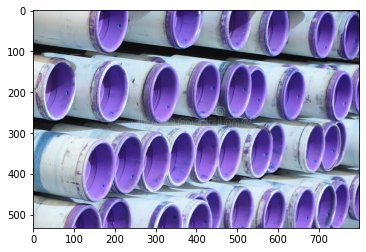

In [8]:
plt.imshow(pipe_img) # BGR

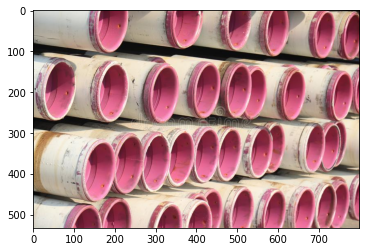

In [9]:
plt.imshow(pipe_rgb) # RGB

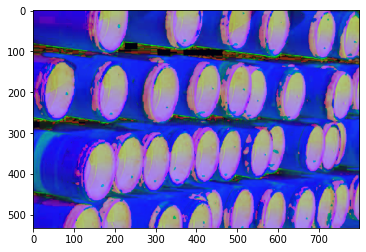

In [10]:
# window_name = 'image'
# cv2.imshow(window_name,pipe_img)
plt.imshow(pipe_hsv)

In [11]:
# color range for pink pipe
#lower range
lower_pipe = np.array([0, 100, 30])
upper_pipe = np.array([10, 255, 255])
mask1 = cv2.inRange(pipe_hsv, lower_pipe, upper_pipe)

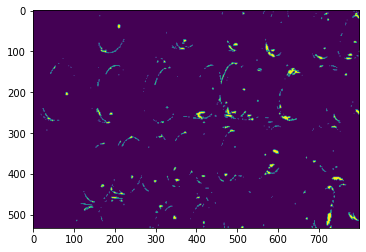

In [12]:
plt.imshow(mask1)

In [13]:
# upper range
lower_pipe = np.array([125, 100, 30])
upper_pipe = np.array([255, 255, 255])
mask2 = cv2.inRange(pipe_hsv, lower_pipe, upper_pipe)

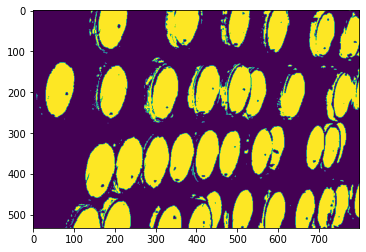

In [14]:
plt.imshow(mask2)

In [15]:
# mask for lower and upper pipe
mask = mask1 + mask2
# Get image in pipe color pixel only
pipeImage = cv2.bitwise_and(pipe_img.copy(), pipe_img.copy(), mask=mask)

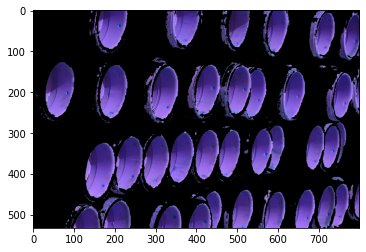

In [16]:
plt.imshow(pipeImage)

In [17]:
# Image Thresholding, Gray Scale, and Gaussian Blur
gray_img = cv2.cvtColor(pipeImage, cv2.COLOR_BGR2GRAY)
blured_img = cv2.blur(gray_img, (10,10))
# blured_img = cv2.GaussianBlur(gray_img,(10,10),0)
ret, thresh = cv2.threshold(blured_img,1,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

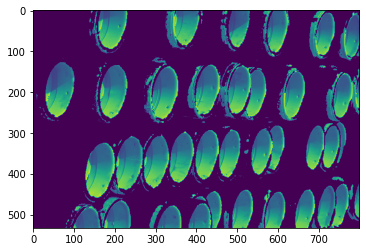

In [18]:
plt.imshow(gray_img)

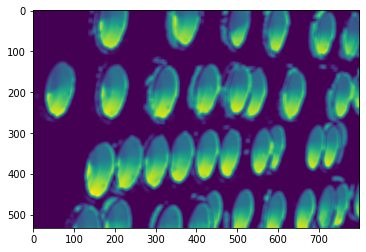

In [19]:
plt.imshow(blured_img)

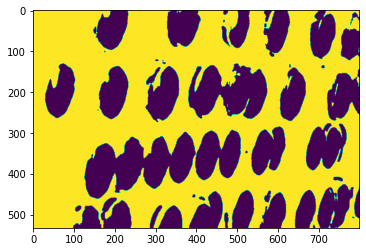

In [20]:
plt.imshow(thresh)

In [21]:
#erote noise using Morphological Transformation operation closing
kernel = np.ones((10,10),np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

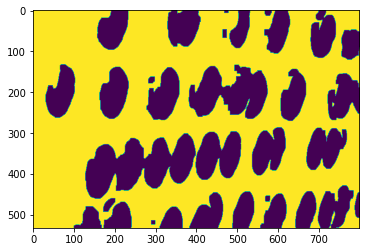

In [22]:
plt.imshow(closing)

In [23]:
#contour area and calculate average area
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarchy = hierarchy[0]
max_area = cv2.contourArea(contours[0])
total = 0 # total contour size
for con in contours:
    area = cv2.contourArea(con) # get contour size
    total += area
    if area > max_area:
        max_area = area
diff = 0.1 # smallest contour have to bigger than (diff * max_area)
max_area = int(max_area * diff) # smallest contour have to bigger
average = int(total / (len(contours))) # average size for contour
radius_avg = int(math.sqrt(average / 3.14)) # average radius 

average = int(average * diff)

In [24]:
# Remove small object
mask = np.zeros(thresh.shape[:2],dtype=np.uint8)
for component in zip(contours, hierarchy):
    currentContour = component[0]
    currentHierarchy = component[1]
    area = cv2.contourArea(currentContour)
    if currentHierarchy[3] < 0:
        if area > average:
            cv2.drawContours(mask, [currentContour], 0, (255), -1)

In [25]:
res1 = pipe_img.copy()
count = 0 #result
for con in contours:
    area = cv2.contourArea(con)
    # print(area)
    # radian = int(math.ceil(math.sqrt(area / 3.14)))
    radian = int(math.sqrt(area / 3.14))
    minRad = int(radian * 0.3)
    maxRad = int(radian * 2)
    mask_temp = np.zeros(mask.shape[:2],dtype=np.uint8)
    cv2.drawContours(mask_temp, [con], 0, (255), -1)
    # circles = cv2.HoughCircles(mask_temp,cv2.HOUGH_GRADIENT,1, 1.2 * radian, param1=100,param2=10,minRadius=minRad,maxRadius=maxRad)
    circles = cv2.HoughCircles(mask_temp,cv2.HOUGH_GRADIENT,1, 20, param1=25,param2=20,minRadius=0,maxRadius=0)
    # print('radian:{} , minRadius:{} , maxRadius:{}'.format(radian, minRad, maxRad))
    
    if circles is not None: 
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            radius = i[2]
            if radius > radius_avg:
                count += 1
                center = (i[0], i[1]) # circle center
                cv2.putText(res1, str(count), center, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2) # Put text at center    
                cv2.circle(res1, center, radius, (0, 0, 255), 3) 

Total: 12 pipes


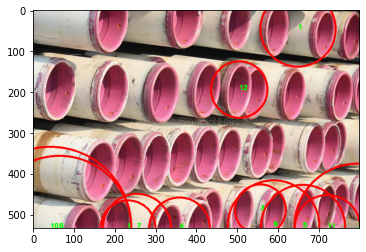

In [26]:
print('Total: {} pipes'.format(count))
# cv2.imshow('image',res1)
plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))

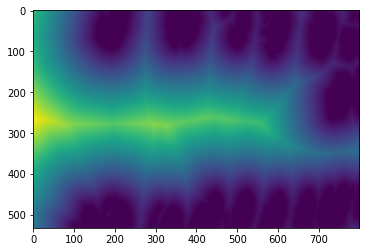

In [30]:
# sure background area
sure_bg = cv2.erode(mask, kernel)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(mask,cv2.DIST_L2,5)
# cv2.imshow(dist_transform)
plt.imshow(dist_transform)

In [2]:
import cv2
import os
import numpy as np
""" 
This is a very simple approach by detecting darker area in the circles region of the pipes

"""

' \nThis is a very simple approach by detecting darker area in the circles region of the pipes\n\n'

In [3]:
#file path
root_dir = '/home/infinity/github/AAIS/Datasets/pipes'
pipe_fname ='sample_002.jpg'
# load pipe images
pipe_img = cv2.imread(os.path.join(root_dir,pipe_fname), cv2.IMREAD_GRAYSCALE)
x,y,w,h = 0,0,pipe_img.shape[0],pipe_img.shape[1]

# parameters.
params = cv2.SimpleBlobDetector_Params()
# thresholds
params.minThreshold = 50;
params.maxThreshold = 200;
# Filter by Area.
params.filterByArea = True
params.minArea = 150
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# pipes detector with the parameters
cvversion = (cv2.__version__).split('.')
if int(cvversion[0]) < 3 :
    pipeDetection = cv2.SimpleBlobDetector(params)
else : 
    pipeDetection = cv2.SimpleBlobDetector_create(params)
    
# blobs detectors
KeyPoint = pipeDetection.detect(pipe_img)
 
# Draw detected blobs
pipeImage = cv2.drawKeypoints(pipe_img, KeyPoint, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



In [4]:
# #Show 
print('Total: {} pipes'.format(len(KeyPoint)))
# cv2.imshow("Pipes Images", pipeImage)
# cv2.putText(img=pipeImage,text=('Total: '+ str(len(KeyPoint))+'Pipes'),org=(x + int(w/10),y + int(h/1.5)), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=4, color=(255,0,0), thickness=7)
# cv2.waitKey(0)

Total: 19 pipes
